# CONTEXT DATA ANALYSIS

In [114]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Get the Data from the official source (INE)

- [Ocupados por sexo y rama de actividad](https://www.ine.es/jaxiT3/Tabla.htm?t=4128)
- [Salario por sexo y rama de actividad](https://www.ine.es/jaxiT3/Tabla.htm?t=28185)

## Data Variables Explanation:

- `ocupados_por_sexo_y_rama_de_actividad.csv` - Consta de 792 entradas y 4 características.

    - `Grupo CNAE 2009` : Sector en el qual vemos la ocupación en ese periodo.
    - `Sexo`: Sexo el cual miramos la ocupación esta puede ser:
        - `Ambos sexos`
        - `Hombres`
        - `Mujeres`
    - `Periodo`: Esto nos indicará el año y trimestre en el que se hace, 4 por año.
    - `Total`: Es el porcentaje de empleo respecto a esa profesión, (Deduzco)

- `salario_medio_por_sexo_y_rama_de_actividad.csv` - Consta de 171 entradas y 4 características.

    - `Grupo CNAE 2009` : Sector en el qual vemos la ocupación en ese periodo.
    - `Sexo`: Sexo el cual miramos la ocupación esta puede ser:
        - `Ambos sexos`
        - `Hombres`
        - `Mujeres`
    - `Periodo`: Esto nos indicará el año y trimestre en el que se hace, 4 por año.
    - `Salario`: Es el porcentaje de empleo respecto a esa profesión, (Deduzco)



In [158]:
def transformation_ocupados(df):
    df['Total'] = pd.to_numeric(df['Total'].apply(lambda numstr: numstr.replace(".", "").replace(",", ".")))
    df.rename(columns = {"Rama de actividad CNAE 2009" : "Grupo CNAE 2009"}, inplace = True)
    df['Periodo'] = df['Periodo'].apply(lambda strperiod: strperiod[:-2])
    df['Periodo'] = df['Periodo'].astype("int")
    if 'Porcentaje' in df['Unidad'].unique():    
        return df.loc[df['Unidad'] == "Porcentaje", ["Grupo CNAE 2009", "Sexo", "Periodo", "Total"]]
    else:
        return df.loc[df['Unidad'] == "Valor absoluto", ["Grupo CNAE 2009", "Sexo", "Periodo", "Total"]]

df_ocupados = pd.read_csv("ocupados_por_sexo_y_rama_de_actividad.csv", sep = ";", decimal = ",")
df_ocupados = transformation_ocupados(df_ocupados)

In [119]:
display(df_ocupados)

,Grupo CNAE 2009,Sexo,Periodo,Total
0,B_S Todas las secciones,Ambos sexos,2019,100.0
1,B_S Todas las secciones,Ambos sexos,2019,100.0
2,B_S Todas las secciones,Ambos sexos,2019,100.0
3,B_S Todas las secciones,Ambos sexos,2019,100.0
4,B_S Todas las secciones,Ambos sexos,2018,100.0
5,B_S Todas las secciones,Ambos sexos,2018,100.0
6,B_S Todas las secciones,Ambos sexos,2018,100.0
7,B_S Todas las secciones,Ambos sexos,2018,100.0
8,B_S Todas las secciones,Ambos sexos,2017,100.0
9,B_S Todas las secciones,Ambos sexos,2017,100.0


In [120]:
df_ocupados['Total'].describe()

count    791.000000
mean       9.101391
std       20.329557
min        0.000000
25%        1.200000
50%        4.000000
75%        7.350000
max      100.000000
Name: Total, dtype: float64

In [121]:
# OCUPADOS data loading
df_ocupados_grouped = pd.DataFrame(df_ocupados.groupby(['Grupo CNAE 2009', "Sexo", "Periodo"])['Total'].mean(), columns = ['Total'])
df_ocupados_grouped.rename(columns = {"Total" : "Total Ocupación (%)"}, inplace = True)
display(df_ocupados_grouped)

Total Ocupación (%)
Grupo CNAE 2009                                    Sexo        Periodo                     
A Agricultura, ganadería, silvicultura y pesca     Ambos sexos 2017                   4.350
                                                               2018                   4.200
                                                               2019                   4.050
                                                   Hombres     2017                   6.050
                                                               2018                   5.900
                                                               2019                   5.700
                                                   Mujeres     2017                   2.300
                                                               2018                   2.175
                                                               2019                   2.050
B Industrias extractivas                           Ambos sexos 2017                   0.200
                                                               2018                   0.200
                                                               2019                   0.200
                                                   Hombres     2017                   0.300
                                                               2018                   0.300
                                                               2019                   0.300
                                                   Mujeres     2017                   0.000
                                                               2018                   0.000
                                                               2019                   0.050
B_S Todas las secciones                            Ambos sexos 2017                 100.000
                                                               2018                 100.000
                                                               2019                 100.000
                                                   Hombres     2017                 100.000
                                                               2018                 100.000
                                                               2019                 100.000
                                                   Mujeres     2017                 100.000
                                                               2018                 100.000
                                                               2019                 100.000
C Industria manufacturera                          Ambos sexos 2017                  12.700
                                                               2018                  12.625
                                                               2019                  12.625
                                                   Hombres     2017                  17.300
                                                               2018                  17.075
                                                               2019                  16.900
                                                   Mujeres     2017                   7.200
                                                               2018                   7.350
                                                               2019                   7.550
D Suministro de energía eléctrica, gas, vapor y... Ambos sexos 2017                   0.450
                                                               2018                   0.400
                                                               2019                   0.500
                                                   Hombres     2017                   0.650
                                                               2018                   0.550
                                                               2019                   0.600
                        

In [51]:
df_ocupados_grouped.head(9)

Total Ocupación (%)
Grupo CNAE 2009                                Sexo        Periodo                     
A Agricultura, ganadería, silvicultura y pesca Ambos sexos 2017                   4.350
                                                           2018                   4.200
                                                           2019                   4.050
                                               Hombres     2017                   6.050
                                                           2018                   5.900
                                                           2019                   5.700
                                               Mujeres     2017                   2.300
                                                           2018                   2.175
                                                           2019                   2.050

In [48]:
df_ocupados_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 198 entries, ('A Agricultura, ganadería, silvicultura y pesca', 'Ambos sexos', 2017) to ('U Actividades de organizaciones y organismos extraterritoriales', 'Mujeres', 2019)
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total Ocupación (%)  198 non-null    float64
dtypes: float64(1)
memory usage: 2.5+ KB


## OCUAPADOS EN VALOR ABSOLUTO

In [150]:
# OCUPADOS ABSOLUTOS data loading
df_ocupados_abs = pd.read_csv("ocupados_por_sexo_y_rama_de_actividad_absolutos.csv", sep = ";", decimal = ",")
df_ocupados_abs = transformation_ocupados(df_ocupados_abs)

In [124]:
display(df_ocupados_abs['Total'].describe())

count     755.000000
mean      613.845298
std       620.186873
min         0.200000
25%       143.350000
50%       453.100000
75%       909.200000
max      3140.100000
Name: Total, dtype: float64

In [125]:
display(df_ocupados_abs)

,Grupo CNAE 2009,Sexo,Periodo,Total
0,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2019,793.9
1,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2019,746.2
2,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2019,809.3
3,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2019,839.7
4,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2018,825.6
5,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2018,768.4
6,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2018,822.5
7,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2018,833.8
8,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2017,820.7
9,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,2017,777.0


In [127]:
df_ocupados_abs_grouped = pd.DataFrame(df_ocupados_abs.groupby(['Grupo CNAE 2009', "Sexo", "Periodo"])['Total'].mean(), columns = ['Total'])
df_ocupados_grouped.rename(columns = {"Total" : "Total Ocupación (valor)"}, inplace = True)
display(df_ocupados_abs_grouped)

Total
Grupo CNAE 2009                                    Sexo        Periodo          
A Agricultura, ganadería, silvicultura y pesca     Ambos sexos 2017      819.500
                                                               2018      812.575
                                                               2019      797.275
                                                   Hombres     2017      624.650
                                                               2018      621.400
                                                               2019      612.325
                                                   Mujeres     2017      194.875
                                                               2018      191.125
                                                               2019      184.975
B Industrias extractivas                           Ambos sexos 2017       33.200
                                                               2018       33.500
                                                               2019       32.625
                                                   Hombres     2017       31.250
                                                               2018       30.325
                                                               2019       28.425
                                                   Mujeres     2017        1.950
                                                               2018        3.200
                                                               2019        4.250
C Industria manufacturera                          Ambos sexos 2017     2393.375
                                                               2018     2444.200
                                                               2019     2494.925
                                                   Hombres     2017     1775.925
                                                               2018     1797.400
                                                               2019     1813.725
                                                   Mujeres     2017      617.450
                                                               2018      646.825
                                                               2019      681.225
D Suministro de energía eléctrica, gas, vapor y... Ambos sexos 2017       83.525
                                                               2018       80.700
                                                               2019       91.225
                                                   Hombres     2017       66.800
                                                               2018       57.625
                                                               2019       65.550
                                                   Mujeres     2017       16.750
                                                               2018       23.075
                                                               2019       25.700
E Suministro de agua, actividades de saneamient... Ambos sexos 2017      137.250
                                                               2018      149.875
                                                               2019      144.300
                                                   Hombres     2017      112.825
                                                               2018      124.675
                                                               2019      114.650
                                                   Mujeres     2017       24.400
                                                               2018       25.200
                                                               2019       29.675
F Construcción                                     Ambos sexos 2017     1128.325
                                                               2018     1221.800
                                                               2019     1277.900
                         

In [128]:
df_ocupados_abs_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 189 entries, ('A Agricultura, ganadería, silvicultura y pesca', 'Ambos sexos', 2017) to ('U Actividades de organizaciones y organismos extraterritoriales', 'Mujeres', 2019)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   189 non-null    float64
dtypes: float64(1)
memory usage: 2.4+ KB


In [129]:
df_ocupados_abs_grouped.head(9)

Total
Grupo CNAE 2009                                Sexo        Periodo         
A Agricultura, ganadería, silvicultura y pesca Ambos sexos 2017     819.500
                                                           2018     812.575
                                                           2019     797.275
                                               Hombres     2017     624.650
                                                           2018     621.400
                                                           2019     612.325
                                               Mujeres     2017     194.875
                                                           2018     191.125
                                                           2019     184.975

# SALARIOS

In [169]:
# SALARIO data loading and casting
def transformation_salario(df):
    df['Total'] = pd.to_numeric(df['Total'].apply(lambda numstr: numstr.replace(".", "").replace(",", ".")))
    df['Periodo'] = df['Periodo'].astype("int")
    df.rename(columns = {"Secciones de la CNAE 2009" : "Grupo CNAE 2009", "Total": "Salario"}, inplace = True)
    df['Salario'] = df.Salario.abs()
    df.set_index(['Grupo CNAE 2009', 'Sexo', "Periodo"])
    return df

df_salario = pd.read_csv("salario_medio_por_sexo_y_rama_de_actividad.csv", sep = ";", decimal = ",")
df_salario = transformation_salario(df_salario)

In [170]:
display(df_salario)

,Grupo CNAE 2009,Sexo,Periodo,Salario
0,B_S Todas las secciones,Ambos sexos,2019,24395.98
1,B_S Todas las secciones,Ambos sexos,2018,24009.12
2,B_S Todas las secciones,Ambos sexos,2017,23646.50
3,B_S Todas las secciones,Mujeres,2019,21682.02
4,B_S Todas las secciones,Mujeres,2018,21011.89
5,B_S Todas las secciones,Mujeres,2017,20607.85
6,B_S Todas las secciones,Hombres,2019,26934.38
7,B_S Todas las secciones,Hombres,2018,26738.19
8,B_S Todas las secciones,Hombres,2017,26391.84
9,B Industrias extractivas,Ambos sexos,2019,34159.42


In [171]:
df_salario_grouped = pd.DataFrame(df_salario.groupby(['Grupo CNAE 2009', "Sexo", "Periodo"])['Salario'].mean(), columns = ['Salario'])
display(df_salario_grouped)

Salario
Grupo CNAE 2009                                    Sexo        Periodo          
B Industrias extractivas                           Ambos sexos 2017     32555.75
                                                               2018     33990.57
                                                               2019     34159.42
                                                   Hombres     2017     32127.49
                                                               2018     33095.45
                                                               2019     33116.69
                                                   Mujeres     2017     35259.06
                                                               2018     38900.71
                                                               2019     39732.29
B_S Todas las secciones                            Ambos sexos 2017     23646.50
                                                               2018     24009.12
                                                               2019     24395.98
                                                   Hombres     2017     26391.84
                                                               2018     26738.19
                                                               2019     26934.38
                                                   Mujeres     2017     20607.85
                                                               2018     21011.89
                                                               2019     21682.02
C Industria manufacturera                          Ambos sexos 2017     27214.30
                                                               2018     27640.12
                                                               2019     27604.74
                                                   Hombres     2017     28741.18
                                                               2018     29288.25
                                                               2019     29188.87
                                                   Mujeres     2017     22857.78
                                                               2018     23091.83
                                                               2019     23339.25
D Suministro de energía eléctrica, gas, vapor y... Ambos sexos 2017     52014.79
                                                               2018     51237.33
                                                               2019     52162.53
                                                   Hombres     2017     54199.45
                                                               2018     53379.93
                                                               2019     54357.93
                                                   Mujeres     2017     44656.93
                                                               2018     44395.92
                                                               2019     45012.17
E Suministro de agua, actividades de saneamient... Ambos sexos 2017     26937.32
                                                               2018     27289.63
                                                               2019     27486.42
                                                   Hombres     2017     27628.19
                                                               2018     28074.77
                                                               2019     28214.35
                                                   Mujeres     2017     24010.74
                                                               2018     24302.84
                                                               2019     24622.26
F Construcción                                     Ambos sexos 2017     22607.96
                                                               2018     22971.05
                                                               2019     22789.30
                       

In [166]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Grupo CNAE 2009  171 non-null    object 
 1   Sexo             171 non-null    object 
 2   Periodo          171 non-null    int32  
 3   Salario          171 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 4.8+ KB


In [167]:
df_salario.head()

,Grupo CNAE 2009,Sexo,Periodo,Salario
0,B_S Todas las secciones,Ambos sexos,2019,24395.98
1,B_S Todas las secciones,Ambos sexos,2018,24009.12
2,B_S Todas las secciones,Ambos sexos,2017,23646.50
3,B_S Todas las secciones,Mujeres,2019,21682.02
4,B_S Todas las secciones,Mujeres,2018,21011.89


# **LEFT JOIN OF BOTH TABLES**

Next table reflects the **spanish laboral market** context between 2017 and 2019, by giving information about occupation weight and mean salary splitted by activity group (CMAE 2009 classification) and gender.

By looking at the statistics, we can immediately identify the presence of a gender gap. It's extreamly severe when comparing `salaries`: **by 2017, woman got paid an average of 5783.99 eur less than man. By 2019, this difference got reduced to 5252.36 eur.**  

We can also see a difference in gender presence by activity group.

In [189]:
# Proceed with left (outer) join
df = df_ocupados_grouped.join(df_salario_grouped, how = "left")
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 198 entries, ('A Agricultura, ganadería, silvicultura y pesca', 'Ambos sexos', 2017) to ('U Actividades de organizaciones y organismos extraterritoriales', 'Mujeres', 2019)
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total Ocupación (%)  198 non-null    float64
 1   Salario              171 non-null    float64
dtypes: float64(2)
memory usage: 12.2+ KB


In [190]:
pd.set_option('display.max_rows', None)
df

Total Ocupación (%)  \
Grupo CNAE 2009                                    Sexo        Periodo                        
A Agricultura, ganadería, silvicultura y pesca     Ambos sexos 2017                   4.350   
                                                               2018                   4.200   
                                                               2019                   4.050   
                                                   Hombres     2017                   6.050   
                                                               2018                   5.900   
                                                               2019                   5.700   
                                                   Mujeres     2017                   2.300   
                                                               2018                   2.175   
                                                               2019                   2.050   
B Industrias extractivas                           Ambos sexos 2017                   0.200   
                                                               2018                   0.200   
                                                               2019                   0.200   
                                                   Hombres     2017                   0.300   
                                                               2018                   0.300   
                                                               2019                   0.300   
                                                   Mujeres     2017                   0.000   
                                                               2018                   0.000   
                                                               2019                   0.050   
B_S Todas las secciones                            Ambos sexos 2017                 100.000   
                                                               2018                 100.000   
                                                               2019                 100.000   
                                                   Hombres     2017                 100.000   
                                                               2018                 100.000   
                                                               2019                 100.000   
                                                   Mujeres     2017                 100.000   
                                                               2018                 100.000   
                                                               2019                 100.000   
C Industria manufacturera                          Ambos sexos 2017                  12.700   
                                                               2018                  12.625   
                                                               2019                  12.625   
                                                   Hombres     2017                  17.300   
                                                               2018                  17.075   
                                                               2019                  16.900   
                                                   Mujeres     2017                   7.200   
                                                               2018                   7.350   
                                                               2019                   7.550   
D Suministro de energía eléctrica, gas, vapor y... Ambos sexos 2017                   0.450   
                                                               2018                   0.400   
                                                               2019                   0.500   
                                                   Hombres     2017                   0.650   
                                                               2018               

In [199]:
# Lets compute all absolute values
df_sal = df.reset_index()
df_todas_las_secciones = df_sal.loc[df_sal['Grupo CNAE 2009'] != "B_S Todas las secciones"].groupby(["Sexo", "Periodo"])['Salario'].sum()
df_todas_las_secciones = df_todas_las_secciones.reset_index()
df_sal.loc[df_sal['Grupo CNAE 2009'] == "B_S Todas las secciones", "Salario"] = df_todas_las_secciones['Salario'].values
df_final = pd.DataFrame(df_sal.groupby(['Grupo CNAE 2009', "Sexo", "Periodo"])['Salario'].mean(), columns = ['Salario'])

In [200]:
display(df_final)

Salario
Grupo CNAE 2009                                    Sexo        Periodo           
A Agricultura, ganadería, silvicultura y pesca     Ambos sexos 2017           NaN
                                                               2018           NaN
                                                               2019           NaN
                                                   Hombres     2017           NaN
                                                               2018           NaN
                                                               2019           NaN
                                                   Mujeres     2017           NaN
                                                               2018           NaN
                                                               2019           NaN
B Industrias extractivas                           Ambos sexos 2017      32555.75
                                                               2018      33990.57
                                                               2019      34159.42
                                                   Hombres     2017      32127.49
                                                               2018      33095.45
                                                               2019      33116.69
                                                   Mujeres     2017      35259.06
                                                               2018      38900.71
                                                               2019      39732.29
B_S Todas las secciones                            Ambos sexos 2017     475823.27
                                                               2018     483016.67
                                                               2019     491504.75
                                                   Hombres     2017     524186.18
                                                               2018     530803.75
                                                               2019     538281.63
                                                   Mujeres     2017     427003.26
                                                               2018     437326.08
                                                               2019     448102.42
C Industria manufacturera                          Ambos sexos 2017      27214.30
                                                               2018      27640.12
                                                               2019      27604.74
                                                   Hombres     2017      28741.18
                                                               2018      29288.25
                                                               2019      29188.87
                                                   Mujeres     2017      22857.78
                                                               2018      23091.83
                                                               2019      23339.25
D Suministro de energía eléctrica, gas, vapor y... Ambos sexos 2017      52014.79
                                                               2018      51237.33
                                                               2019      52162.53
                                                   Hombres     2017      54199.45
                                                               2018      53379.93
                                                               2019      54357.93
                                                   Mujeres     2017      44656.93
                                                               2018      44395.92
                                                               2019      45012.17
E Suministro de agua, actividades de saneamient... Ambos sexos 2017      26937.32
                                                               2018      27289.63
                                                        

In [201]:
# We add both tags and 

short_group_dict = {
    'A Agricultura, ganadería, silvicultura y pesca' : "Agricultura y pesca",
    'B Industrias extractivas' : 'Industrias extractivas', 
    'B_S Todas las secciones' : "Todas",
    'C Industria manufacturera' : 'Industria manufacturera',
    'D Suministro de energía eléctrica, gas, vapor y aire acondicionado' : "Suministro Energía",
    'E Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación' : "Suministro Agua",
    'F Construcción' : "Construcción",
    'G Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas' : "Comercio",
    'H Transporte y almacenamiento' : "Transporte", 
    'I Hostelería' : "Hostelería",
    'J Información y comunicaciones' : "Informática",
    'K Actividades financieras y de seguros' : "Finanzas y banca",
    'L Actividades inmobiliarias' : "Inmobiliaria",
    'M Actividades profesionales, científicas y técnicas' : "Científico y técnico",
    'N Actividades administrativas y servicios auxiliares' : "Administrativo y auxiliar",
    'O Administración Pública y defensa, Seguridad Social obligatoria' : "Administración Pública",
    'P Educación' : "Educación", 
    'Q Actividades sanitarias y de servicios sociales' : "Sanidad",
    'R Actividades artísticas, recreativas y de entretenimiento' : "Arte y Entretenimiento",
    'S Otros servicios' : "Otros Servicios",
    'T Actividades de los hogares como empleadores de personal doméstico, actividades de los hogares como productores de bienes y servicios para uso propio' : "Actividades Domésticas",
    'U Actividades de organizaciones y organismos extraterritoriales' : "Organización y territorial"

}
df_sal = df_sal.reset_index()
df_sal["tag"] = df_sal.loc[df_sal['Grupo CNAE 2009'] != "B_S Todas las secciones", 'Grupo CNAE 2009'].apply(lambda x: x[0])
df_sal['grupo'] = df_sal['Grupo CNAE 2009'].apply(lambda x: short_group_dict[x])
df_sal['Salario'] = df_sal['Salario'].apply(lambda x: abs(x))

In [202]:
df_sal['Grupo CNAE 2009'].unique()

array(['A Agricultura, ganadería, silvicultura y pesca',
       'B Industrias extractivas', 'B_S Todas las secciones',
       'C Industria manufacturera',
       'D Suministro de energía eléctrica, gas, vapor y aire acondicionado',
       'E Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación',
       'F Construcción',
       'G Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas',
       'H Transporte y almacenamiento', 'I Hostelería',
       'J Información y comunicaciones',
       'K Actividades financieras y de seguros',
       'L Actividades inmobiliarias',
       'M Actividades profesionales, científicas y técnicas',
       'N Actividades administrativas y servicios auxiliares',
       'O Administración Pública y defensa, Seguridad Social obligatoria',
       'P Educación', 'Q Actividades sanitarias y de servicios sociales',
       'R Actividades artísticas, recreativas y de entretenimiento',
       'S Otros ser

1. **Activity group compared by occupation**

In [209]:
# Sort the data to be plotted
df_1 = df_sal.loc[(df_sal['Periodo'] == 2019) & (df_sal['Grupo CNAE 2009'] != "B_S Todas las secciones")]
tags_sorted = df_1.loc[ (df_1['Sexo'] == "Ambos sexos") ].sort_values("Salario", ascending = False)['tag'].unique()

activity_group_by_sex = pd.pivot_table(df_1, index = "tag", columns = ['Sexo'], values = ['Total Ocupación (%)'])
activity_group_by_sex = activity_group_by_sex.loc[tags_sorted[:]]
activity_group_by_sex = activity_group_by_sex.round(decimals = 3)
activity_group_by_sex.T.iloc[:, :]

tag                                  D      K      J     B      O      M  \
                    Sexo                                                   
Total Ocupación (%) Ambos sexos  0.500  2.200  3.025  0.20  6.825  5.200   
                    Hombres      0.600  1.875  3.875  0.30  7.075  4.750   
                    Mujeres      0.275  2.525  2.050  0.05  6.475  5.675   

tag                                   C     Q      E       P  ...      L  \
                    Sexo                                      ...          
Total Ocupación (%) Ambos sexos  12.625   8.5  0.700   6.950  ...  0.775   
                    Hombres      16.900   3.7  1.075   4.225  ...  0.650   
                    Mujeres       7.550  14.2  0.325  10.175  ...  0.925   

tag                                   F       G     R      N      S       I  \
                    Sexo                                                      
Total Ocupación (%) Ambos sexos   6.450  15.525  2.05  5.225  2.425   8.675   
                    Hombres      10.825  14.525  2.25  4.400  1.450   7.400   
                    Mujeres       1.275  16.725  1.80  6.150  3.575  10.175   

tag                                 A      T    U  
                    Sexo                           
Total Ocupación (%) Ambos sexos  4.05  3.000  0.0  
                    Hombres      5.70  0.675  0.0  
                    Mujeres      2.05  5.775  0.0  

[3 rows x 21 columns]

## Plot Study of Ocupation by sector

In [130]:
testing_cat = df_ocupados[df_ocupados['Grupo CNAE 2009'] == 'A Agricultura, ganadería, silvicultura y pesca']

In [160]:
def plot_sexes_occupation(df, category, path, df_type='occupations'):

    lines_plot = []
    for sex in df['Sexo'].unique():
        single_line = df[df['Sexo'] == sex]
        X = list(reversed(single_line.Periodo.values))
        Y = list(reversed(single_line.Total.values))
        Y = [abs(ele) for ele in Y]
        lines_plot.append((X, Y, sex))
        
    plt.figure(figsize=(10, 10))
    for line in lines_plot:
        plt.plot(line[0], line[1], label=line[2])
        
    plt.legend(prop={'size':12})
    plt.title('Occupation in: ' + category, fontsize=15)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('Total number of people', fontsize=20)
    plt.savefig(path + f'/{category}_occupation.png')
    plt.show()

def create_path(dir_path):
    try:
        os.makedirs(dir_path)
    except FileExistsError:
        pass

def plot_occupations(df, path):
    create_path(path)
    for category in df['Grupo CNAE 2009'].unique():
        df_occ = df[df['Grupo CNAE 2009'] == category]
        plot_sexes_occupation(df_occ, category, path)


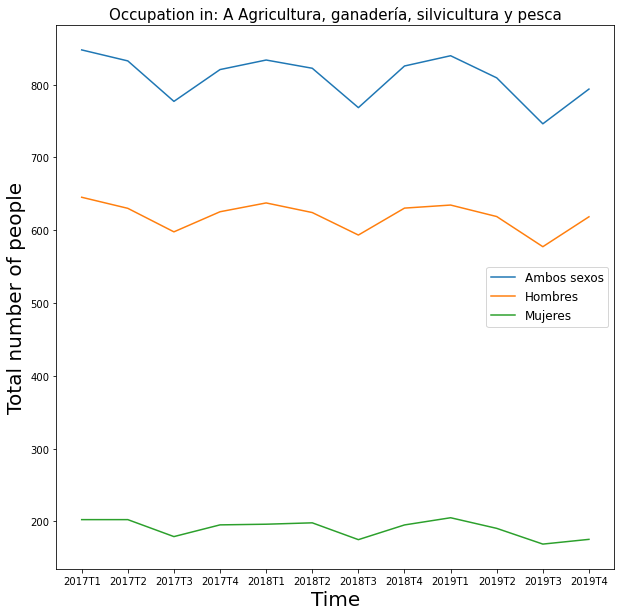

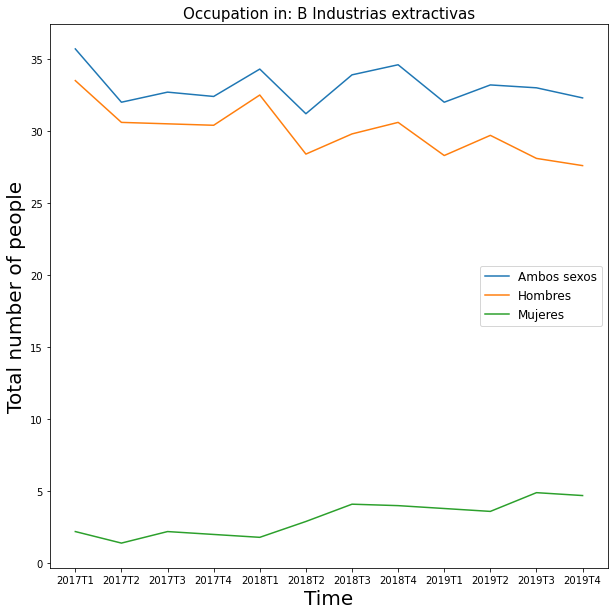

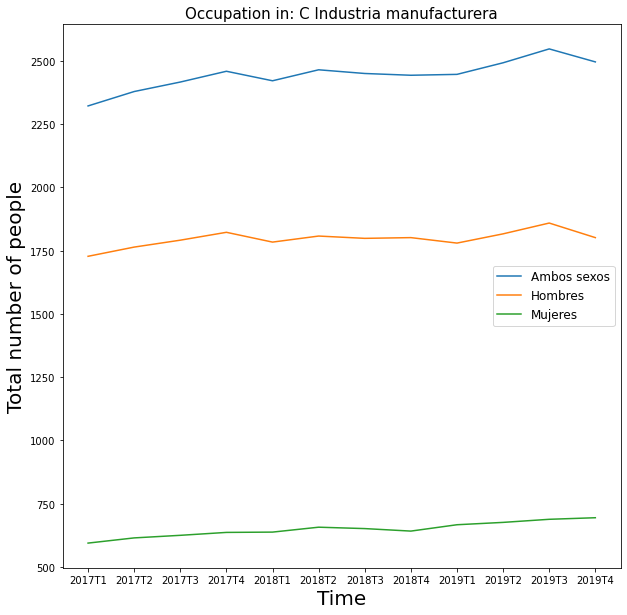

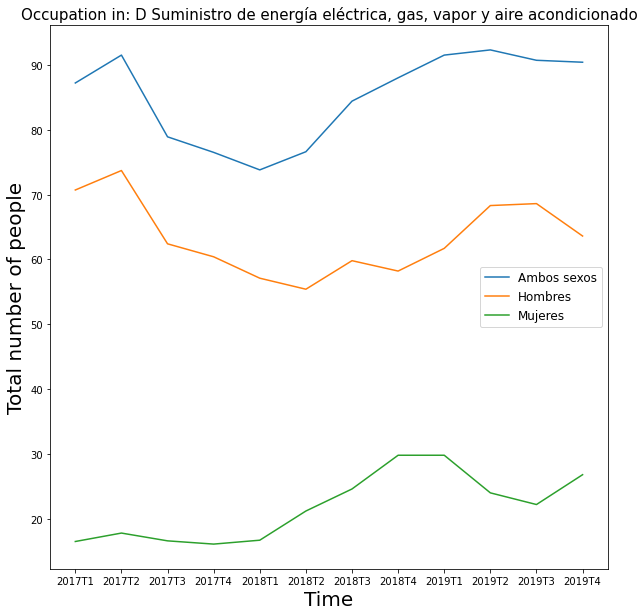

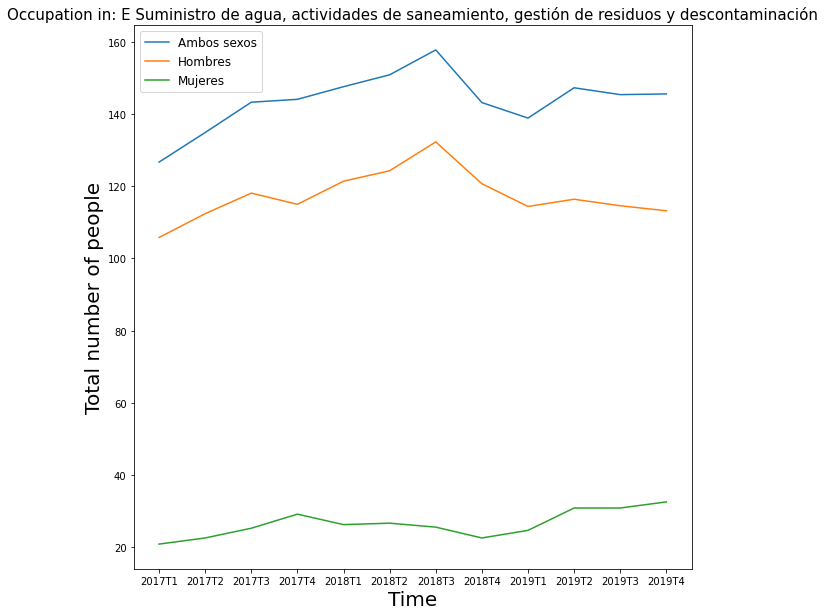

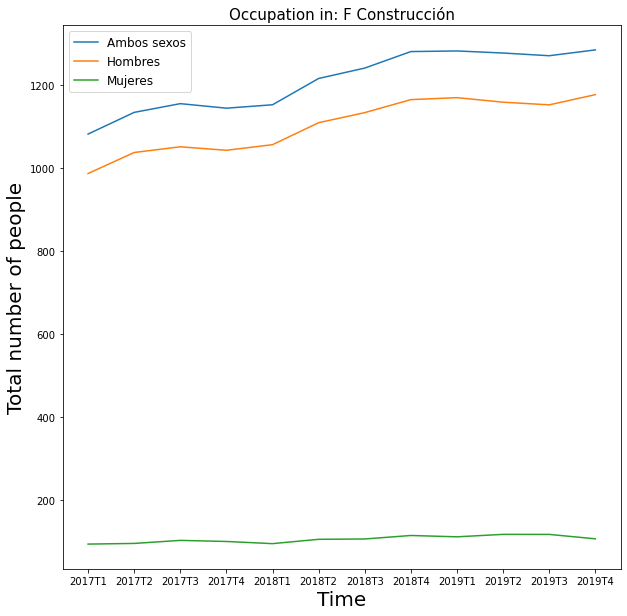

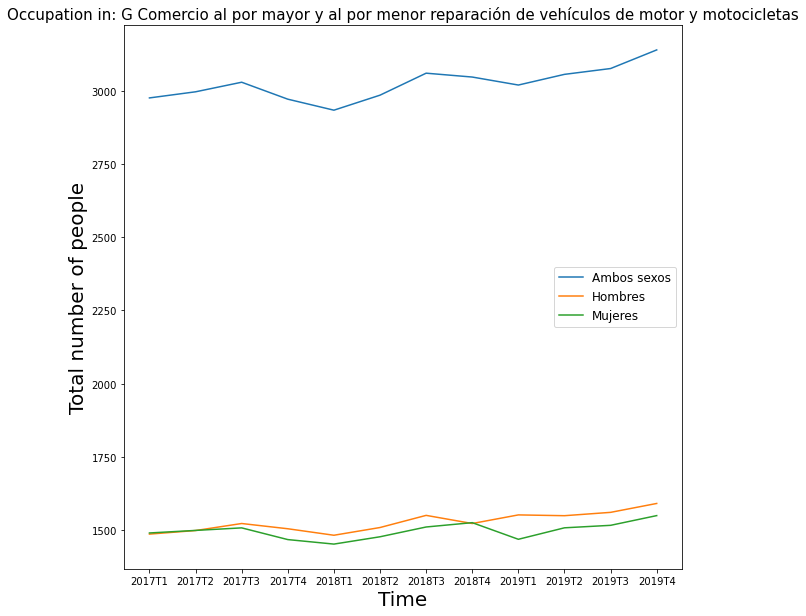

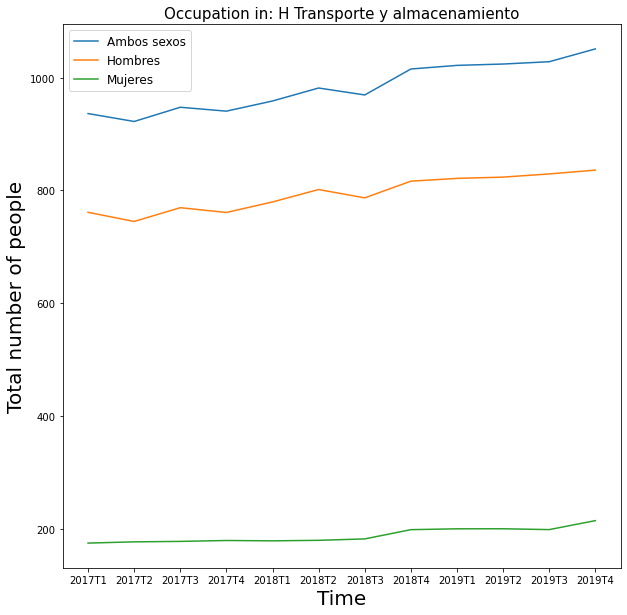

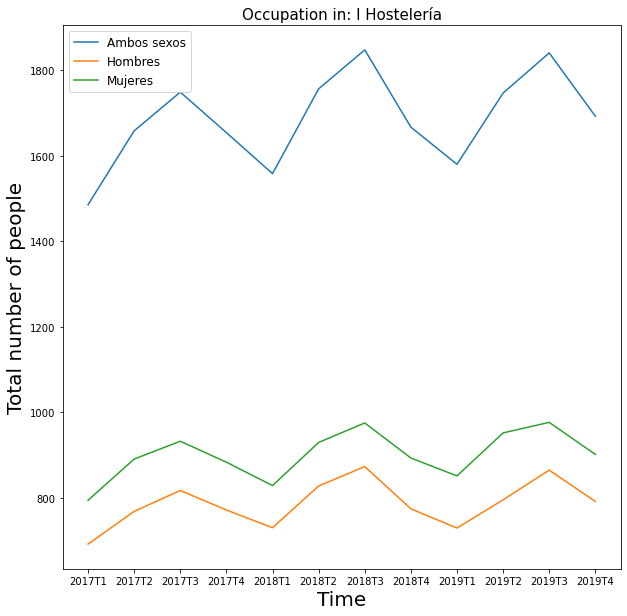

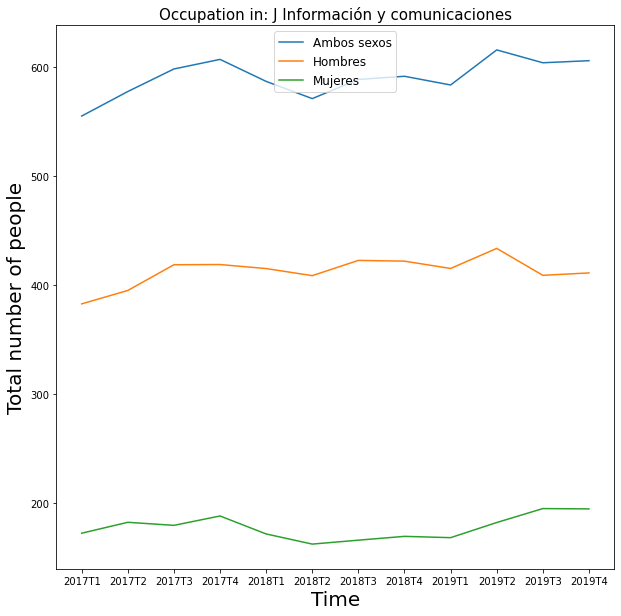

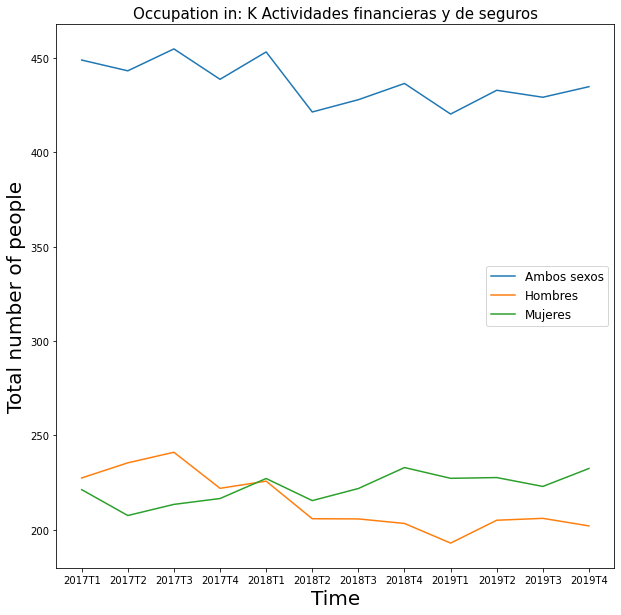

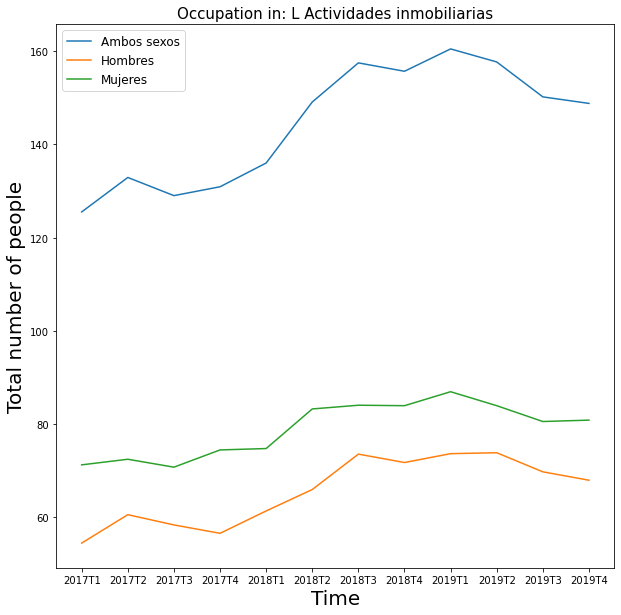

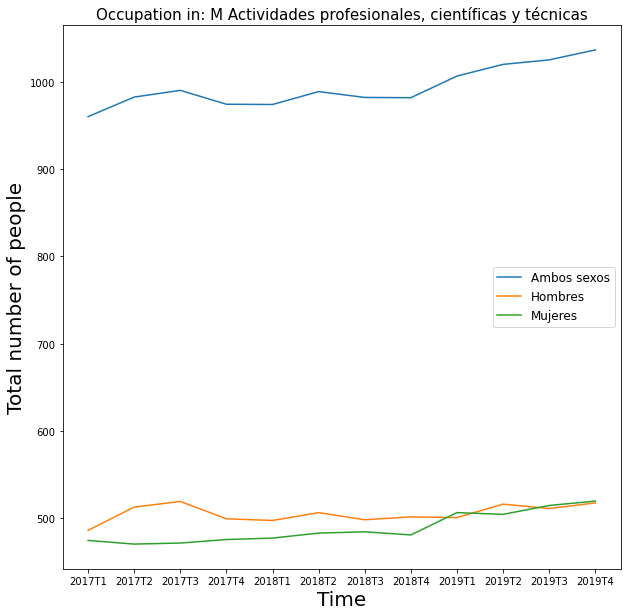

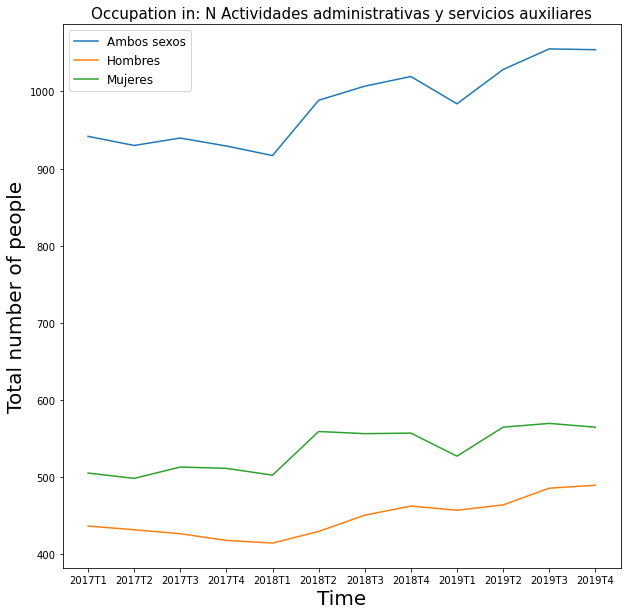

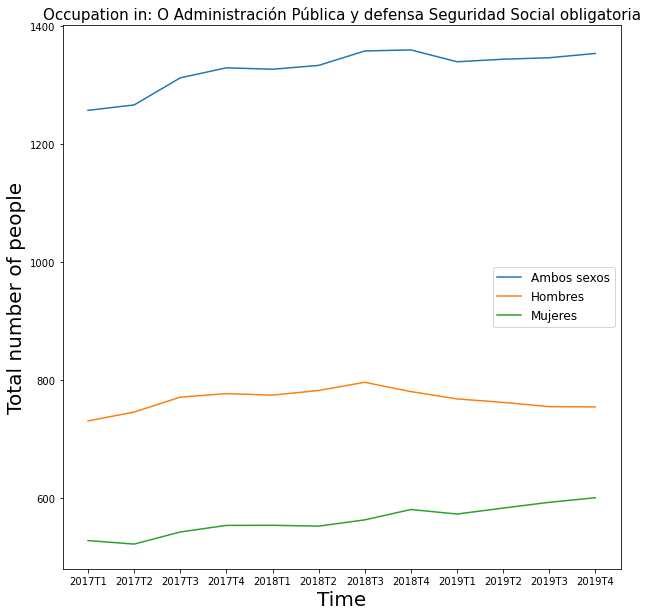

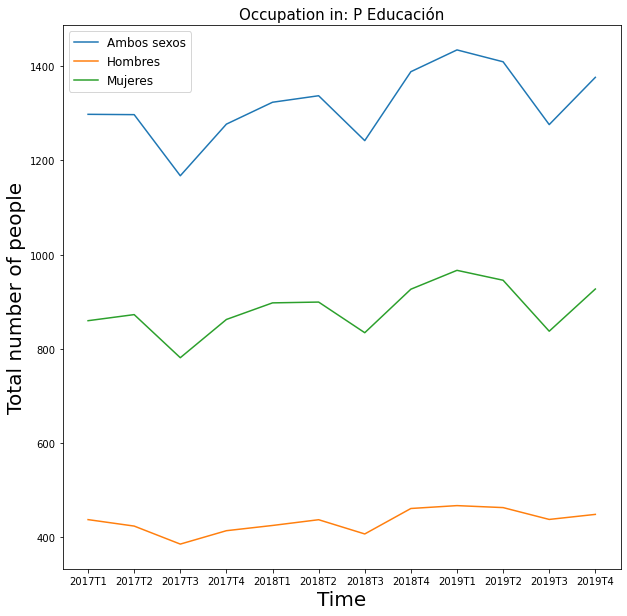

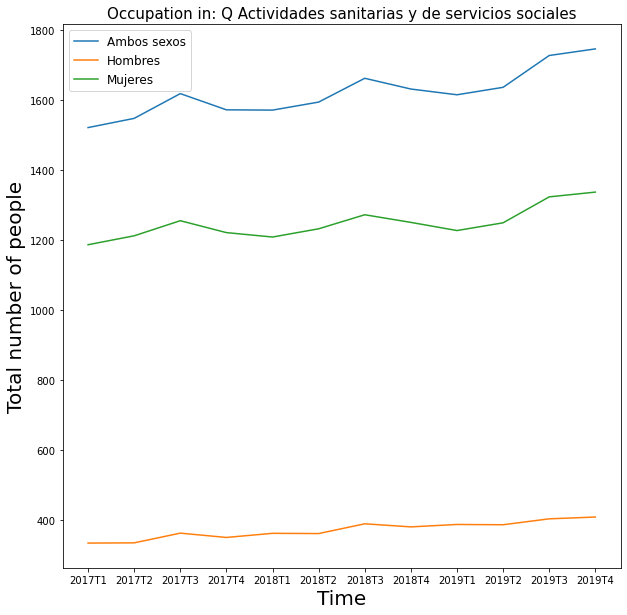

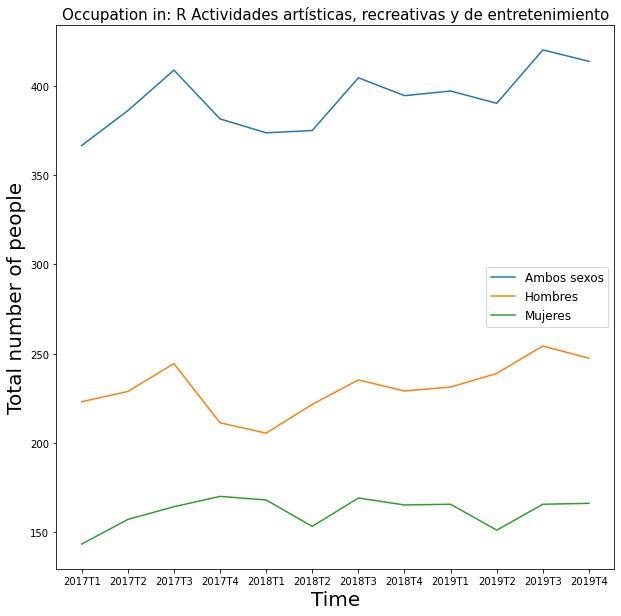

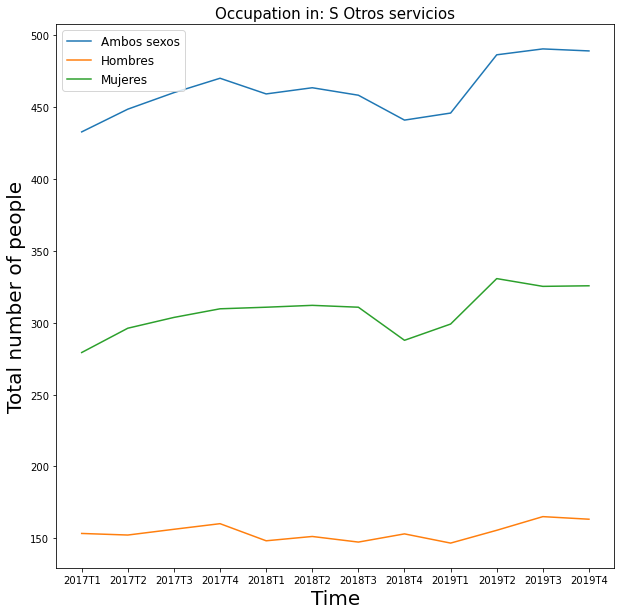

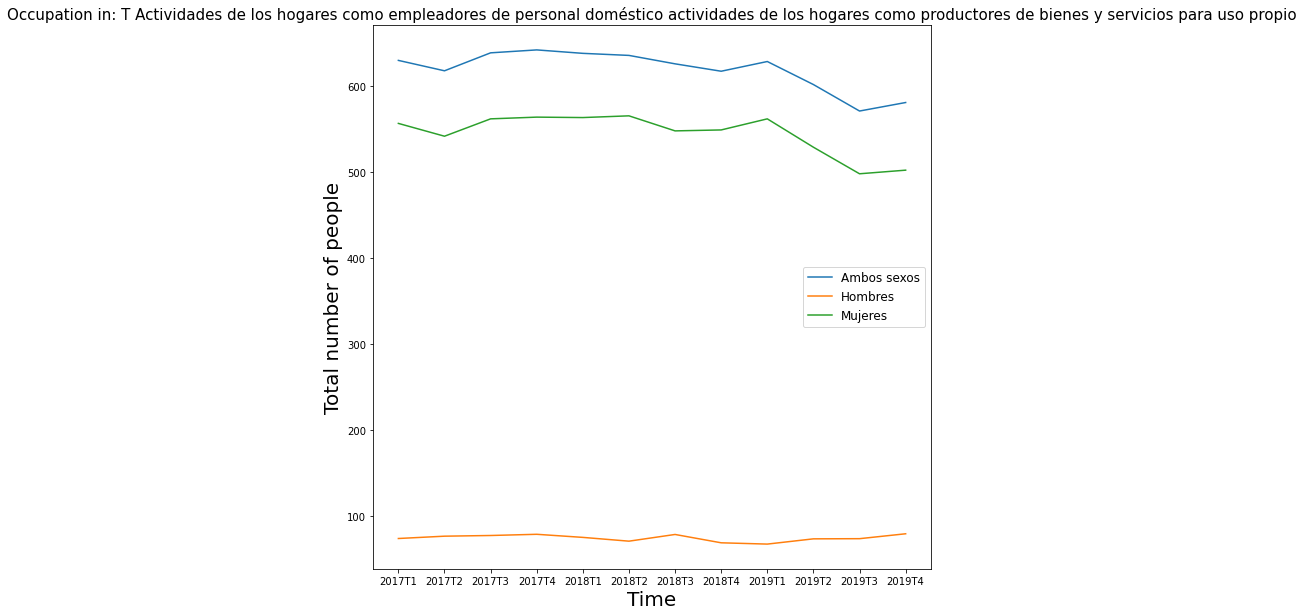

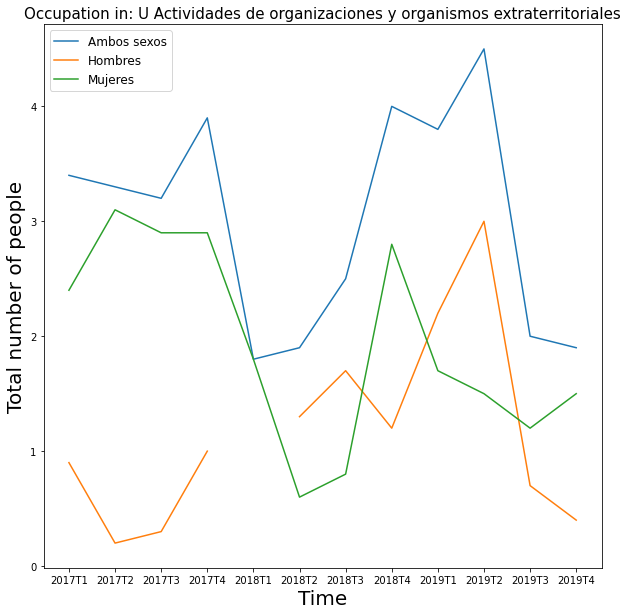

In [161]:
df_ocupados_all = pd.read_csv("ocupados_por_sexo_y_rama_de_actividad_all.csv")

plot_occupations(df_ocupados_all, 'occupations_plots')

## Salary by category

In [211]:
# df_1 (2019, no all sections) sorted by ambos sexos grouped
sorted_tags = df_1.loc[df_1['Sexo'] == "Ambos sexos"].sort_values(by = "Total Ocupación (%)", ascending = True)['tag']
df_2 = df_1.set_index('tag').loc[sorted_tags].reset_index()
df_2 = df_2.loc[df_2['Sexo'] != "Ambos sexos"]
fig = px.bar( df_2, 
        y = 'grupo', 
        x = 'Total Ocupación (%)',
        color = 'Sexo', 
        barmode="group", 
        hover_data = ['Grupo CNAE 2009'], 
        orientation = 'h',
        height = 1200,
        width = 800, 
)

fig.update_layout(
        title_text='Ocupación por Grupo de Actividad', 
        title_x = 0.5,
        xaxis_title="Ocupación [miles personas]",
        yaxis_title="Grupo CNAE (abreviación)",
        font=dict(
        #family="Courier New, monospace",
        size=18,
        #color="RebeccaPurple"
        ),
)

2. **Activity groups compared by salary**

In [212]:
# Salary by category

# df_1 (2019, no all sections) sorted by ambos sexos grouped
sorted_tags = df_1.loc[df_1['Sexo'] == "Ambos sexos"].sort_values(by = "Salario", ascending = True)['tag']
df_2 = df_1.set_index('tag').loc[sorted_tags].reset_index()
df_2 = df_2.loc[df_2['Sexo'] != "Ambos sexos"]

fig = px.bar( 
        df_2, 
        y = 'grupo', 
        x = 'Salario',
        color = 'Sexo', 
        barmode = "group", 
        hover_data = ['Grupo CNAE 2009'], 
        orientation = 'h',
        height = 1200,
        width = 800, 
)

fig.update_layout(
        title_text='Ocupación por Grupo de Actividad', 
        title_x = 0.5,
        xaxis_title="Ocupación [miles personas]",
        yaxis_title="Grupo CNAE (abreviación)",
        font=dict(
        #family="Courier New, monospace",
        size=18,
        #color="RebeccaPurple"
        ),
)

3. **Gender gap facts**

In [20]:
df_1 = df_ocupados.reset_index()
df_2 = df_ocupados_abs.reset_index()

A = set(list(df_1['Grupo CNAE 2009'].unique()))
B = set(list(df_2['Grupo CNAE 2009'].unique()))

print(A - B)
print(B - A)

{'B_S Todas las secciones'}

set()


# DATA MERGING

In [224]:
df_gender_100 = pd.read_csv("ocupados_por_sexo_y_rama_de_actividad.csv", sep = ";", decimal = ",")
df_gender_abs = pd.read_csv("ocupados_por_sexo_y_rama_de_actividad_absolutos.csv", sep = ";", decimal = ",")

In [231]:
df_porcentaje_2022T1 = df_gender_100.loc[(df_gender_100['Unidad'] == 'Porcentaje') & (df_gender_100['Periodo'] == "2019T1")].reset_index()
df_porcentaje_2022T1 = df_porcentaje_2022T1[["Rama de actividad CNAE 2009", "Sexo", "Total"]]

df_absoluto_2022T1 = df_gender_abs.loc[(df_gender_abs['Unidad'] == "Valor absoluto") & (df_gender_abs['Periodo'] == "2019T1")].reset_index()
df_absoluto_2022T1 = df_absoluto_2022T1[["Rama de actividad CNAE 2009", "Sexo", "Total"]]

In [233]:
df_porcentaje_2022T1.head()

,Rama de actividad CNAE 2009,Sexo,Total
0,B_S Todas las secciones,Ambos sexos,"100,0"
1,B_S Todas las secciones,Hombres,"100,0"
2,B_S Todas las secciones,Mujeres,"100,0"
3,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,"4,3"
4,"A Agricultura, ganadería, silvicultura y pesca",Hombres,"6,0"


In [234]:
df_absoluto_2022T1.head()

,Rama de actividad CNAE 2009,Sexo,Total
0,"A Agricultura, ganadería, silvicultura y pesca",Ambos sexos,"839,7"
1,"A Agricultura, ganadería, silvicultura y pesca",Hombres,"634,6"
2,"A Agricultura, ganadería, silvicultura y pesca",Mujeres,"205,1"
3,B Industrias extractivas,Ambos sexos,"32,0"
4,B Industrias extractivas,Hombres,"28,3"


In [237]:
# Sort the data to be plotted
categories_sorted = df_gender_100[df_gender_100['Sexo'] == "Ambos sexos"].sort_values("Total", ascending = False)['Rama de actividad CNAE 2009'].unique()
df1 = df_porcentaje_2022T1.set_index("Rama de actividad CNAE 2009")
df_porcentaje_2022T1_sorted = df1.loc[categories_sorted].reset_index()
df_porcentaje_2022T1_sorted.head(50)

,Rama de actividad CNAE 2009,Sexo,Total
0,I Hostelería,Ambos sexos,"8,1"
1,I Hostelería,Hombres,"6,9"
2,I Hostelería,Mujeres,"9,6"
3,Q Actividades sanitarias y de servicios sociales,Ambos sexos,"8,3"
4,Q Actividades sanitarias y de servicios sociales,Hombres,"3,7"
5,Q Actividades sanitarias y de servicios sociales,Mujeres,"13,8"
6,P Educación,Ambos sexos,"7,4"
7,P Educación,Hombres,"4,4"
8,P Educación,Mujeres,"10,9"
9,"O Administración Pública y defensa, Seguridad ...",Ambos sexos,"6,9"


### **OCUPADOS POR SEXO Y RAMA DE ACTIVIDAD (CNAE 2009)**

In [238]:
pd.pivot_table(df_porcentaje_2022T1_sorted, index = "Rama de actividad CNAE 2009", columns = ['Sexo']).loc[categories_sorted]

C:\Users\isa31\anaconda3\lib\site-packages\pandas\core\apply.py:507: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



Rama de actividad CNAE 2009
I Hostelería
Q Actividades sanitarias y de servicios sociales
P Educación
"O Administración Pública y defensa, Seguridad Social obligatoria"
F Construcción
N Actividades administrativas y servicios auxiliares
H Transporte y almacenamiento
"M Actividades profesionales, científicas y técnicas"
"A Agricultura, ganadería, silvicultura y pesca"
"T Actividades de los hogares como empleadores de personal doméstico, actividades de los hogares como productores de bienes y servicios para uso propio"


In [239]:
df_porcentaje_2022T1_sorted.head(50)

,Rama de actividad CNAE 2009,Sexo,Total
0,I Hostelería,Ambos sexos,"8,1"
1,I Hostelería,Hombres,"6,9"
2,I Hostelería,Mujeres,"9,6"
3,Q Actividades sanitarias y de servicios sociales,Ambos sexos,"8,3"
4,Q Actividades sanitarias y de servicios sociales,Hombres,"3,7"
5,Q Actividades sanitarias y de servicios sociales,Mujeres,"13,8"
6,P Educación,Ambos sexos,"7,4"
7,P Educación,Hombres,"4,4"
8,P Educación,Mujeres,"10,9"
9,"O Administración Pública y defensa, Seguridad ...",Ambos sexos,"6,9"


In [241]:
rama_actividad_encode = {}
rama_actividad_decode = {}
for name in df_gender_100["Rama de actividad CNAE 2009"].unique():
    if name == "Total": 
        rama_actividad_encode["Total"] = "Total"
        rama_actividad_decode["Total"] = "Total"

    else: 
        rama_actividad_encode[name] = name[0]
        rama_actividad_decode[name[0]] = name

rama_actividad_encode

{'B_S Todas las secciones': 'B',
 'A Agricultura, ganadería, silvicultura y pesca': 'A',
 'B Industrias extractivas': 'B',
 'C Industria manufacturera': 'C',
 'D Suministro de energía eléctrica, gas, vapor y aire acondicionado': 'D',
 'E Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación': 'E',
 'F Construcción': 'F',
 'G Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas': 'G',
 'H Transporte y almacenamiento': 'H',
 'I Hostelería': 'I',
 'J Información y comunicaciones': 'J',
 'K Actividades financieras y de seguros': 'K',
 'L Actividades inmobiliarias': 'L',
 'M Actividades profesionales, científicas y técnicas': 'M',
 'N Actividades administrativas y servicios auxiliares': 'N',
 'O Administración Pública y defensa, Seguridad Social obligatoria': 'O',
 'P Educación': 'P',
 'Q Actividades sanitarias y de servicios sociales': 'Q',
 'R Actividades artísticas, recreativas y de entretenimiento': 'R',
 'S Otros servici